In [1]:
from tabulate import tabulate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importamos los datos de una encuesta a nuestro codigo

datos = pd.read_csv("Mall_Customers.csv")


In [3]:
#Aqui hare el recuento de hombres por cada ingreso que haya:
# Definir los rangos de ingresos anuales
bins = [0, 20, 40, 60, 80, 100, 120, 140]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-120', '120-140']

# Crear una nueva columna que representa el rango de ingresos anuales
datos['IncomeRange'] = pd.cut(datos['Annual_Income'], bins=bins, labels=labels)

# Seleccionar solo las filas donde el género es "Male"
datos_male = datos[datos['Gender'] == 'Male']

# Contar la frecuencia de "Male" en cada rango de ingresos anuales
counter = datos_male['IncomeRange'].value_counts(sort=False)

# Convertir la Serie en un DataFrame y resetear los índices
counter_df = counter.to_frame().reset_index()

# Renombrar las columnas
counter_df.columns = ['Rangos', 'Frecuencia']

counter_df
        

,Rangos,Frecuencia
0,0-20,6
1,20-40,12
2,40-60,21
3,60-80,30
4,80-100,14
5,100-120,2
6,120-140,3


In [4]:
#Sacar la frecuencia absoluta
counter_df['Fak'] = counter_df['Frecuencia'].cumsum()

counter_df

,Rangos,Frecuencia,Fak
0,0-20,6,6
1,20-40,12,18
2,40-60,21,39
3,60-80,30,69
4,80-100,14,83
5,100-120,2,85
6,120-140,3,88


In [5]:
# Simulación de datos de ejemplo
data = {'Rangos': [pd.Interval(0, 20), pd.Interval(20, 40), pd.Interval(40, 60), pd.Interval(60, 80), pd.Interval(80,100),pd.Interval(100,120),pd.Interval(120,140)],
        'Frecuencia': [6, 12, 21, 30,14,2,3]}

# Crear DataFrame
counter_df = pd.DataFrame(data)

# Ordenar el DataFrame por 'Rangos'
counter_df = counter_df.sort_values('Rangos')

# Calcular la columna 'Fak' (Frecuencia acumulada)
counter_df['Fak'] = counter_df['Frecuencia'].cumsum()

# Encontrar la clase mediana
N = counter_df['Frecuencia'].sum()
median_group = counter_df[counter_df['Fak'] >= N / 2].iloc[0]

# Calcular la mediana
L = median_group['Rangos'].left  # Límite inferior del intervalo de la clase mediana
F = counter_df[counter_df['Rangos'] < median_group['Rangos']]['Fak'].max() if len(counter_df) > 1 else 0
f = median_group['Frecuencia']  # Frecuencia de la clase mediana
C = median_group['Rangos'].right - median_group['Rangos'].left  # Amplitud del intervalo de la clase mediana

# Fórmula para calcular la mediana
median = L + ((N / 2 - F) / f) * C

print(f"Mediana calculada: {median}")


Mediana calculada: 63.333333333333336


In [6]:
# Encontrar la clase modal (la de mayor frecuencia)
modal_group = counter_df.loc[counter_df['Frecuencia'].idxmax()]

# Definir el límite inferior de la clase modal
L = modal_group['Rangos'].left

# Frecuencia de la clase modal
f_m = modal_group['Frecuencia']

# Frecuencia de la clase anterior
f_a = counter_df.loc[counter_df.index < modal_group.name, 'Frecuencia'].max() if modal_group.name != counter_df.index[0] else 0

# Frecuencia de la clase siguiente
f_b = counter_df.loc[counter_df.index > modal_group.name, 'Frecuencia'].max() if modal_group.name != counter_df.index[-1] else 0

# Amplitud del intervalo de la clase modal
C = modal_group['Rangos'].right - modal_group['Rangos'].left

# Calcular la moda usando la fórmula
mode = L + ((f_m - f_a) / ((f_m - f_a) + (f_m - f_b))) * C

print(f"Moda calculada: {mode}")


Moda calculada: 67.2


In [7]:
# Calcular la media
media = counter_df['Frecuencia'].mean()
print(f"Media calculada: {media}")

Media calculada: 12.571428571428571


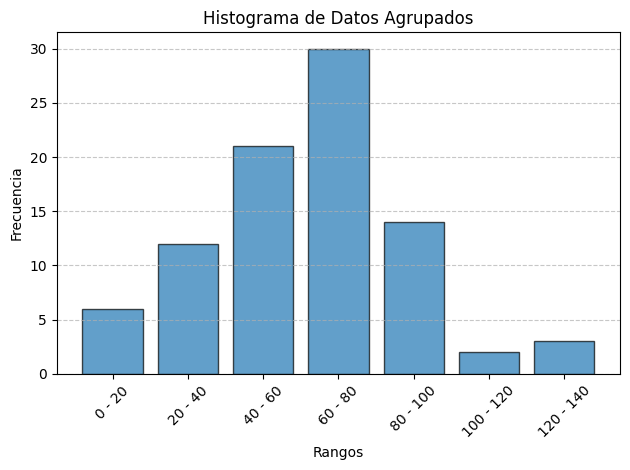

In [8]:

# Extraer los límites de los intervalos para el eje X
x_labels = [f"{interval.left} - {interval.right}" for interval in counter_df['Rangos']]

# Crear el histograma utilizando 'Rangos' como eje X y 'Frecuencia' como eje Y
plt.bar(
    x=x_labels,
    height=counter_df['Frecuencia'],
    align='center',
    edgecolor='black',
    alpha=0.7
)

# Configurar etiquetas y título
plt.xlabel('Rangos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Datos Agrupados')
plt.xticks(rotation=45)

# Mostrar el histograma
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

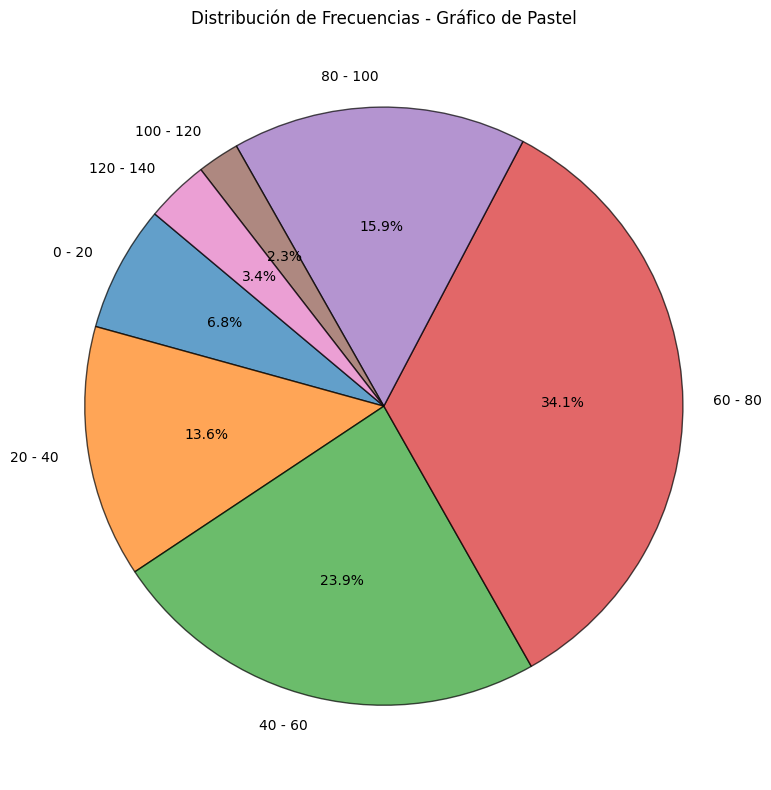

In [9]:
labels = [f"{interval.left} - {interval.right}" for interval in counter_df['Rangos']]

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(
    counter_df['Frecuencia'],
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black', 'alpha': 0.7}
)

# Título del gráfico
plt.title('Distribución de Frecuencias - Gráfico de Pastel')

# Mostrar el gráfico de pastel
plt.tight_layout()
plt.show()


26.737165763368623


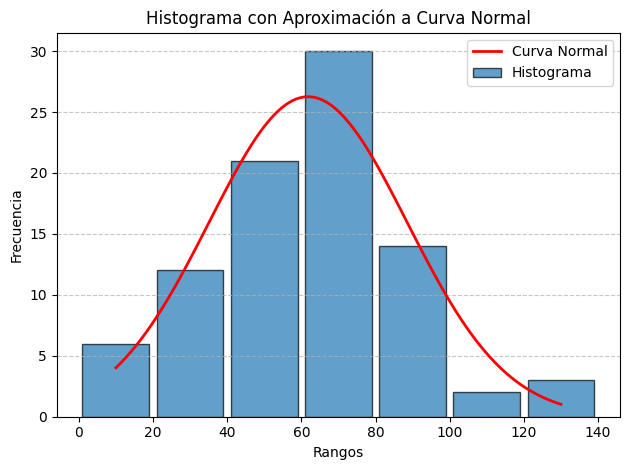

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# # Simulación de datos de ejemplo
# data = {'Rangos': [pd.Interval(0, 10), pd.Interval(10, 20), pd.Interval(20, 30), pd.Interval(30, 40)],
#         'Frecuencia': [15, 25, 35, 20]}

# # Crear DataFrame
# counter_df = pd.DataFrame(data)

# # Ordenar el DataFrame por 'Rangos'
# counter_df = counter_df.sort_values('Rangos')

# Extraer los límites de los intervalos para el eje X
x_labels = [f"{interval.left} - {interval.right}" for interval in counter_df['Rangos']]
interval_centers = [interval.mid for interval in counter_df['Rangos']]

# Calcular la media y la desviación estándar de los datos agrupados
frequencies = counter_df['Frecuencia'].values
interval_midpoints = np.array([interval.mid for interval in counter_df['Rangos']])
mean = np.average(interval_midpoints, weights=frequencies)
std_dev = np.sqrt(np.average(((interval_midpoints - mean) ** 2), weights=frequencies))
print(std_dev)

# Crear el histograma con un ligero espacio entre las barras
bar_widths = [interval.right - interval.left for interval in counter_df['Rangos']]
bar_widths = [width * 0.9 for width in bar_widths]  # Reduce ligeramente el ancho de cada barra

plt.bar(
    x=interval_centers,
    height=frequencies,
    width=bar_widths,
    align='center',
    edgecolor='black',
    alpha=0.7,
    label='Histograma'
)

# Generar la curva normal
x_range = np.linspace(min(interval_centers), max(interval_centers), 100)
y_normal = norm.pdf(x_range, mean, std_dev) * sum(frequencies) * (counter_df['Rangos'][0].right - counter_df['Rangos'][0].left)

# Añadir la curva normal al gráfico
plt.plot(x_range, y_normal, color='red', linewidth=2, label='Curva Normal')

# Configurar etiquetas y título
plt.xlabel('Rangos')
plt.ylabel('Frecuencia')
plt.title('Histograma con Aproximación a Curva Normal')
plt.xticks([interval.left for interval in counter_df['Rangos']] + [counter_df['Rangos'].iloc[-1].right])
plt.legend()

# Mostrar el histograma con la curva normal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


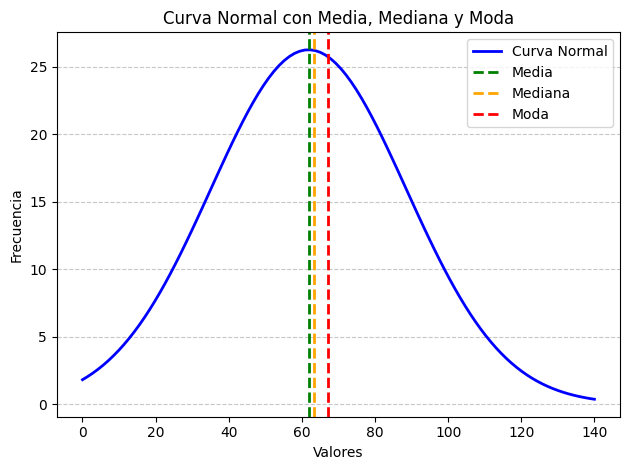

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


# Calcular la media, mediana y moda (valores estimados ya conocidos)
frequencies = counter_df['Frecuencia'].values
interval_midpoints = np.array([interval.mid for interval in counter_df['Rangos']])

# Calcular la desviación estándar
std_dev = np.sqrt(np.average((interval_midpoints - mean) ** 2, weights=frequencies))

# Generar la curva normal
x_range = np.linspace(min(interval_midpoints) - 10, max(interval_midpoints) + 10, 100)
y_normal = norm.pdf(x_range, mean, std_dev) * sum(frequencies) * (counter_df['Rangos'][0].right - counter_df['Rangos'][0].left)
# Media
mean = np.average(interval_midpoints, weights=frequencies)
# Graficar solo la curva normal
plt.plot(x_range, y_normal, color='blue', linewidth=2, label='Curva Normal')

# Añadir líneas verticales para la Media, Mediana y Moda
plt.axvline(mean, color='green', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(median, color='orange', linestyle='dashed', linewidth=2, label='Mediana')
plt.axvline(mode, color='red', linestyle='dashed', linewidth=2, label='Moda')

# Etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Curva Normal con Media, Mediana y Moda')
plt.legend()

# Mostrar la gráfica
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [12]:
# Determinacion de tablas de contingencias

contingency_table = pd.crosstab(index=datos['IncomeRange'], columns=datos['Gender'])
contingency_table['Total'] = contingency_table.sum(axis=1)
contingency_table


Gender,Female,Male,Total
IncomeRange,,,
0-20,10,6,16
20-40,22,12,34
40-60,27,21,48
60-80,34,30,64
80-100,10,14,24
100-120,8,2,10
120-140,1,3,4


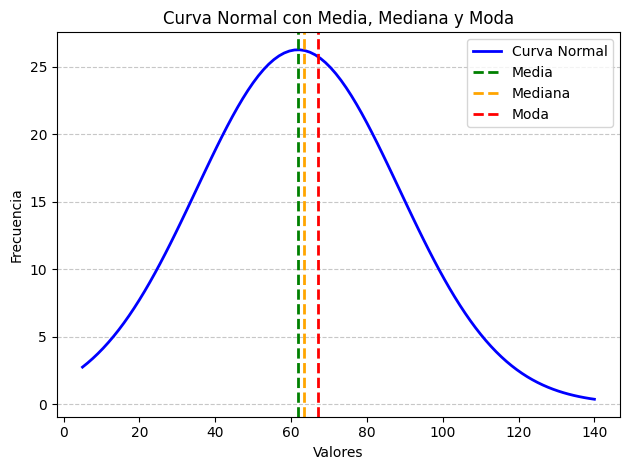

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Ordenar el DataFrame por 'Rangos'
counter_df = counter_df.sort_values('Rangos')

# Extraer los límites y puntos medios de los intervalos
interval_centers = [interval.mid for interval in counter_df['Rangos']]
bar_widths = [interval.right - interval.left for interval in counter_df['Rangos']]
frequencies = counter_df['Frecuencia'].values

# Calcular la media, mediana y moda a partir de counter_df

# Media
mean = np.average(interval_centers, weights=frequencies)

# Mediana
N = sum(frequencies)
cumulative_frequencies = np.cumsum(frequencies)
median_group = counter_df[cumulative_frequencies >= N / 2].iloc[0]
L = median_group['Rangos'].left
F = cumulative_frequencies[cumulative_frequencies < N / 2].max() if len(cumulative_frequencies) > 1 else 0
f = median_group['Frecuencia']
C = median_group['Rangos'].right - median_group['Rangos'].left
median = L + ((N / 2 - F) / f) * C

# Moda
modal_group = counter_df.loc[counter_df['Frecuencia'].idxmax()]
L_modal = modal_group['Rangos'].left
f_m = modal_group['Frecuencia']
f_a = counter_df.loc[counter_df.index < modal_group.name, 'Frecuencia'].max() if modal_group.name != counter_df.index[0] else 0
f_b = counter_df.loc[counter_df.index > modal_group.name, 'Frecuencia'].max() if modal_group.name != counter_df.index[-1] else 0
C_modal = modal_group['Rangos'].right - modal_group['Rangos'].left
mode = L_modal + ((f_m - f_a) / ((f_m - f_a) + (f_m - f_b))) * C_modal

# Calcular la desviación estándar
std_dev = np.sqrt(np.average((np.array(interval_centers) - mean) ** 2, weights=frequencies))

# Generar la curva normal
x_range = np.linspace(min(interval_centers) - 5, max(interval_centers) + 10, 100)
y_normal = norm.pdf(x_range, mean, std_dev) * (sum(frequencies) * bar_widths[0])

# Graficar solo la curva normal
plt.plot(x_range, y_normal, color='blue', linewidth=2, label='Curva Normal')

# Añadir líneas verticales para la Media, Mediana y Moda
plt.axvline(mean, color='green', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(median, color='orange', linestyle='dashed', linewidth=2, label='Mediana')
plt.axvline(mode, color='red', linestyle='dashed', linewidth=2, label='Moda')

# Etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Curva Normal con Media, Mediana y Moda')
plt.legend()

# Mostrar la gráfica
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
El